In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\USER\Downloads\turkey\turkey energy consumption.csv')

In [3]:
print(df)

             Date   Hour Consumption (MWh)
0      31.12.2015  00:00         29,590.88
1      31.12.2015  01:00         27,785.43
2      31.12.2015  02:00         26,516.53
3      31.12.2015  03:00         26,091.62
4      31.12.2015  04:00         25,871.54
...           ...    ...               ...
39883  18.07.2020  19:00         38,719.46
39884  18.07.2020  20:00         39,732.82
39885  18.07.2020  21:00         39,575.60
39886  18.07.2020  22:00         36,209.21
39887  18.07.2020  23:00              0.00

[39888 rows x 3 columns]


In [4]:
df['Date'] =pd.to_datetime(df['Date'] +' '+ df['Hour'], format='%d.%m.%Y %H:%M')

In [5]:
pd.date_range(start = '2016-01-01 00:00:00', end = '2020-03-24 00:00:00', freq = 'D').difference(df.Date)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [6]:
df = df.drop('Hour', axis = 1)

In [7]:
df.head()

,Date,Consumption (MWh)
0,2015-12-31 00:00:00,"29,590.88"
1,2015-12-31 01:00:00,"27,785.43"
2,2015-12-31 02:00:00,"26,516.53"
3,2015-12-31 03:00:00,"26,091.62"
4,2015-12-31 04:00:00,"25,871.54"


In [8]:
df['Consumption (MWh)'] = df['Consumption (MWh)'].str.replace(',','')
df['Consumption (MWh)'] = pd.to_numeric(df['Consumption (MWh)'])

In [9]:
df = df.sort_values('Date')

In [10]:
df.head()

,Date,Consumption (MWh)
0,2015-12-31 00:00:00,29590.88
1,2015-12-31 01:00:00,27785.43
2,2015-12-31 02:00:00,26516.53
3,2015-12-31 03:00:00,26091.62
4,2015-12-31 04:00:00,25871.54


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39888 entries, 0 to 39887
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               39888 non-null  datetime64[ns]
 1   Consumption (MWh)  39888 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 934.9 KB


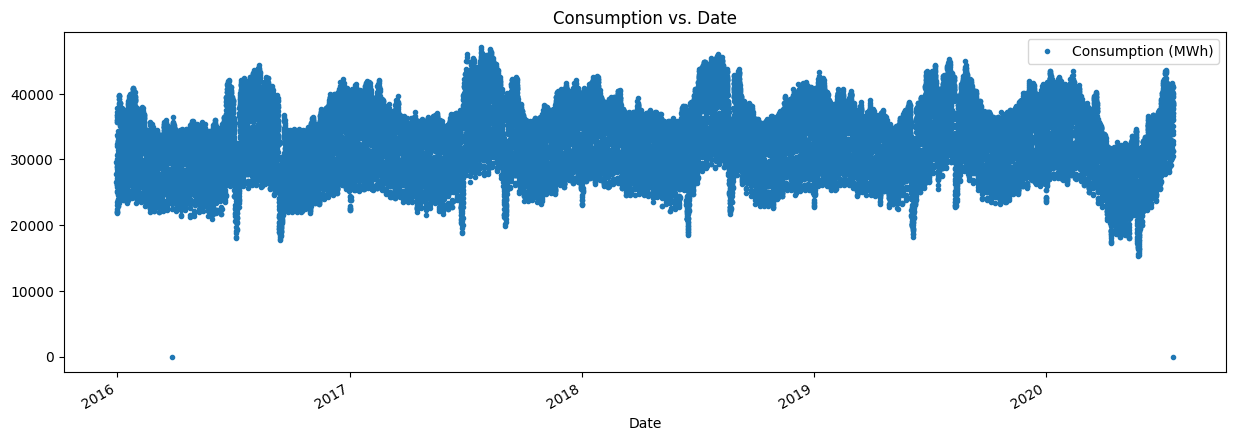

In [12]:
df.set_index('Date').plot(style='.', figsize=(15,5), title='Consumption vs. Date')
plt.show()

Text(0.5, 1.0, 'Hourly Consumption')

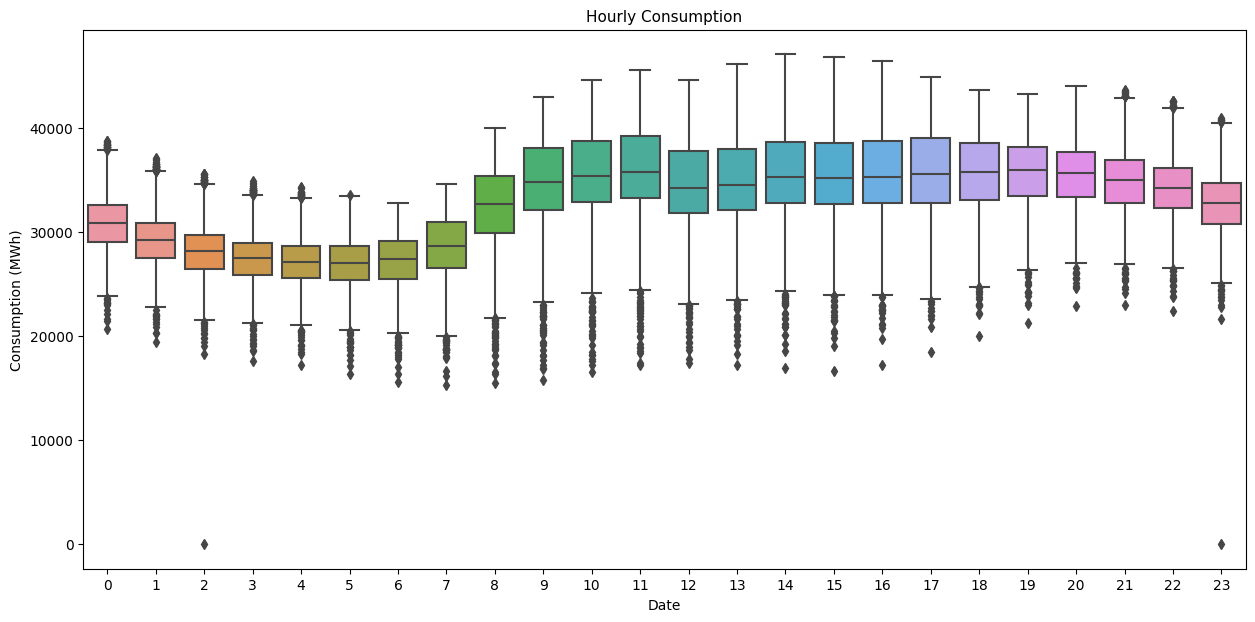

In [13]:
plt.figure(figsize = (15, 7))
ax = sns.boxplot(x=df['Date'].dt.hour, y="Consumption (MWh)", data=df)
plt.title('Hourly Consumption', fontsize=11)

In [17]:
df['hour'] = df['Date'].dt.hour
df['day_of_week'] = df['Date'].dt.dayofweek
df['month'] = df['Date'].dt.month

In [30]:
df

,Date,Consumption (MWh),hour,day_of_week,month
0,2015-12-31 00:00:00,10.295255,0,3,12
1,2015-12-31 01:00:00,10.232303,1,3,12
2,2015-12-31 02:00:00,10.185561,2,3,12
3,2015-12-31 03:00:00,10.169408,3,3,12
4,2015-12-31 04:00:00,10.160937,4,3,12
...,...,...,...,...,...
39883,2020-07-18 19:00:00,10.564123,19,5,7
39884,2020-07-18 20:00:00,10.589958,20,5,7
39885,2020-07-18 21:00:00,10.585993,21,5,7
39886,2020-07-18 22:00:00,10.497096,22,5,7


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
X = df[['hour', 'day_of_week', 'month']]  # Features
y = df['Consumption (MWh)']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [37]:
y_pred = model.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.007440782787413728


In [39]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7067546816370778

In [40]:
model.predict([[0 , 3 , 12 ]])

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10.3722365])

In [41]:
df

,Date,Consumption (MWh),hour,day_of_week,month
0,2015-12-31 00:00:00,10.295255,0,3,12
1,2015-12-31 01:00:00,10.232303,1,3,12
2,2015-12-31 02:00:00,10.185561,2,3,12
3,2015-12-31 03:00:00,10.169408,3,3,12
4,2015-12-31 04:00:00,10.160937,4,3,12
...,...,...,...,...,...
39883,2020-07-18 19:00:00,10.564123,19,5,7
39884,2020-07-18 20:00:00,10.589958,20,5,7
39885,2020-07-18 21:00:00,10.585993,21,5,7
39886,2020-07-18 22:00:00,10.497096,22,5,7


In [32]:
corr = df.corr()
corr

,Date,Consumption (MWh),hour,day_of_week,month
Date,1.000000,0.049743,0.000596,-0.000519,0.056215
Consumption (MWh),0.049743,1.000000,0.456461,-0.188491,0.044111
hour,0.000596,0.456461,1.000000,0.000005,-0.000003
day_of_week,-0.000519,-0.188491,0.000005,1.000000,0.004613
month,0.056215,0.044111,-0.000003,0.004613,1.000000
